# Wrangle and Analyze Data of a Twitter Account


## Table of Contents
- [0. Introduction](#intro)
- [1. Gather data](#gather)
- [2. Assess data](#assess)
- [3. Clean data](#clean)
- [4. Analysis & Visualization](#analysis)


<a id='gather'></a>
## 0. Introduction

This project is an analysis of correlation between the Covid-19 cases and the political environment of different countries. Did the countries which had more success in containing the amount of Covid-19 cases something in common? Is there a correlation in  Gross domestic product, Human Development Index or political ideology with the amount of Covid-19 cases of the country.
Main goal of this project is to generate a comprehensive exploratory and explanatory data analysis of the gathered data. Firstly data is gathered from different sources: The Covid-19 data of this project is retrieved via programmatically downloaded csv-files from the GitHub repository [Covid-19](https://github.com/CSSEGISandData/COVID-19) and additional data about countries is retrieved via the wikipedia API. Secondly the data from the different sources is visually and programmatically assessed to be cleaned in the next step for the final analysis. 


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from datetime import date
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()

In [2]:
# Gather data from GitHub 
df_Fatality = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_Confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_Recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_Countries = pd.read_csv('https://raw.githubusercontent.com/RRighart/covid-19/master/countries.csv')

In [3]:
# cited from: https://www.rrighart.com/blog-covid19/a-jupyter-notebook-for-visualizing-the-covid-19-pandemic

def data_visualization(filename, countries, pop, number, date1, date2):
    """filename= 'Confirmed' or 'Fatality'
    countries=country_list,
    pop= 'absolute', 'inhabitants', 'area'
    number= 1000000 inhabitants or 10000 km2 area
    date1= start date
    date2= end date
    """    

    # Checking input argument filename
    if filename == 'Fatality': fn='time_series_covid19_deaths_global.csv'
    elif filename == 'Confirmed': fn='time_series_covid19_confirmed_global.csv'
    elif filename == 'Recovered': fn='time_series_covid19_recovered_global.csv'
    else: print('Wrong input for filename')

    # Checking input argument pop
    if pop == 'area': per, ent='per','km2'
    elif pop == 'inhabitants': per,ent='per','persons'
    elif pop == 'normal': number, per, ent='','',''
    else: ent='persons', print('Wrong input for pop')
    
    title=str(filename)+' cases'+' '+str(per)+' '+str(number)+' '+str(ent)
        
    dat1 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'+fn)
    dat2 = pd.read_csv('https://raw.githubusercontent.com/RRighart/covid-19/master/countries.csv')
      
    dat1 = dat1[(dat1['Country/Region'].isin(countries)) & (dat1['Province/State'].isin([np.nan*len(country_list)]))]
    dat1 = pd.melt(dat1.drop(['Lat', 'Long', 'Province/State'], axis=1), id_vars = ['Country/Region'])
    dat1 = dat1.rename({'variable':'date', 'value':'metric'}, axis=1)
    dat1['date']=pd.to_datetime(dat1['date'])
    dat = pd.merge(dat1, dat2, on=['Country/Region'])
    dat = dat.sort_values(by='date', ascending=True)
    
    if pop == 'area' or pop == 'inhabitants': 
        dat[pop] = dat[pop].div(number)
        dat['yvalue'] = dat['metric'].div(dat[pop])
    else: dat['yvalue'] = dat['metric'].copy() 
    
    dat = dat[(dat['date']>=date1) & (dat['date']<=date2)]
    colors = mpl.cm.tab20(np.linspace(0,1,len(countries)))
    plt.figure(figsize = (16, 8))

    countries = list(dat.loc[(dat['Country/Region'].isin(countries)) & (dat['date']==dat['date'].max()), ['Country/Region', 'yvalue']].sort_values(by='yvalue', ascending=False)['Country/Region'])
    
    for i,j in zip(countries, np.arange(0,len(countries))):
        plt.plot(dat[dat['Country/Region'] == i]['date'], dat[dat['Country/Region'] == i]['yvalue'], label=i, marker='o', color=colors[j])
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of '+filename+' Cases')
    plt.title(title, fontsize=16)
   
    plt.legend()
    plt.savefig('covid.png')

In [4]:
df_Countries.head()

,Unnamed: 0,Country/Region,inhabitants,area
0,0,US,325386357,9833520
1,1,Germany,83792987,357386
2,2,France,65227357,551695
3,3,Belgium,11579502,30510
4,4,Netherlands,17123478,41198


In [5]:
df_Fatality.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,64,68,72,85,90,95,104,106,109,115
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,450,453,459,463,465,470,476,483,488,494
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,42,43,44,45,45,46,46,47,47,48
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [6]:
df_Confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,745,747,748,750,751,751,752,752,754
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,30,35,35,35,36,36,36,43,43


In [7]:
df_Recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,260,310,331,345,397,421,458,468,472,502
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,470,488,519,531,543,570,595,605,620,627
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1779,1821,1872,1936,1998,2067,2197,2323,2467,2546
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,468,468,472,493,499,514,521,526,537,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,11,11,11,11,11,11,11,11,13


Additional Information
- Leader Gender
- Ideology of Leading Party
- Amount of Intensive Care Beds
- Gross domestic product per capita
- Human Development Index

Countries of interest:
- Germany
- Italy 
- Spain
- Sweden
- USA
- Brazil
- Netherlands
- Russia


In [5]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge wikipedia

Solving environment: done

## Package Plan ##

  environment location: /usr/local/anaconda3

  added / updated specs:
    - wikipedia


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wikipedia-1.4.0            |             py_2          13 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          13 KB

The following NEW packages will be INSTALLED:

  wikipedia          conda-forge/noarch::wikipedia-1.4.0-py_2

The following packages will be UPDATED:

  openssl                                 1.1.1f-h0b31af3_0 --> 1.1.1g-h0b31af3_0



wikipedia-1.4.0      | 13 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: - WARNING conda.core.path_actions:verify(963): Unable to create environments file. Path not writable.
  environment location: /Users/leopoldwal

In [6]:
import wikipedia

In [8]:
print(wikipedia.search("Germany"))

['Germany', 'Nazi Germany', 'History of Germany', 'Germans', 'East Germany', 'German language', 'German Navy', 'German', 'Western Germany', 'Economy of Germany']


Questions:
Duration of inclination
Steepness of 

In [848]:
# Import necessary libraries
import numpy as np
import pandas as pd
#import requests # to download files programmatically 
#import os # to work with local directory
#import tweepy # for twitter-api
#import time # for timer 
#import json # to create json file from python dictionary
#import re

<a id='intro'></a>
## 1. Gather data

####  Data is gathered from three different sources of data as described in steps below:

1. ..
2. ...

### a. Read data from csv-file

### b. Programmatically download file from url

In [491]:
# Create request-object with url of file
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#response = requests.get(url)

In [492]:
# Create file with content of response-object
#with open(url.split('/')[-1], mode='wb') as file: 
#    file.write(response.content)

In [493]:
# Read tweet image predictions from tsv
#df_image_predictions = pd.read_csv(url.split('/')[-1], sep='\t')

### c. Query additional information for tweets via Twitter API

Rate limit reached. Sleeping for: 690
Rate limit reached. Sleeping for: 710


1928.3107409477234


<a id='assess'></a>
## 2. Assess data

After gathering each of the above pieces of data, they are assessed visually and programmatically for quality and tidiness issues. Requirements to be met:

- Quality requirements:
    - Completeness: All necessary records in dataframes, no specific rows, columns or cells missing.
    - Validity: No records available, that do not conform schema.
    - Accuracy: No wrong data, that is valid.
    - Consistency: No data, that is valid and accurate, but referred to in multiple correct ways.
- Tidiniss requirements (as defined by Hadley Wickham):
    - each variable is a column
    - each observation is a row
    - each type of observational unit is a table.

### a. Visual assessment

In [ ]:
# Assess df_twitter_archive_enhanced visually
# .sample(n=5)

### b. Programmatic assessment

In [1]:
# Check datatypes and non-null count of columns in df_twitter_archive_enhanced
# .info()

In [2]:
# Check if column rating_denominator of df_twitter_archive_enhanced only consists of value 10
# .value_counts()

In [3]:
# Check for percentiles and standard deviation of image prediction confidence
# .describe()

In [5]:
# Check for duplicate column names across three dataframes
#all_columns = pd.Series(list(df_twitter_archive_enhanced) + list(df_image_predictions) + list(df_tweet_api_info))
#all_columns[all_columns.duplicated()]

### Findings, which contradict requirements:

#### Quality Observations:
- ...

#### Tidiness Observations:
- ..
- ...

<a id='clean'></a>
## 3. Clean data

In [6]:
# Create copies for cleaning process to preserve original dataframes
# .copy()

### Issue 1:
#### Observe:
- Validity: ...

#### Define:
- Drop 

#### Code:

In [1684]:
# Keep only rows without values in 'retweeted_status_id'
# df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[
#     df_twitter_archive_enhanced_clean['retweeted_status_id'].isnull()]

# Drop variables which are only necessary for retweets
# df_twitter_archive_enhanced_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 
#                                         'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test:

In [1685]:
# Check if amount twitter ids reduced as expected
# assert len(df_twitter_archive_enhanced_clean) == len(df_twitter_archive_enhanced)-181

In [7]:
# Check if columnns `in_reply_to_status_id`, `in_reply_to_user_id` and `retweeted_status_timestamp` dropped
# list(df_twitter_archive_enhanced)

### Issue 2:
#### Observe:
- Validity: ..

#### Define:
- ..

#### Code:

#### Test:

In [8]:
# Check if any row left without value in rating_numerator column
# assert len(df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['rating_numerator'].isnull()]) == 0

### Issue 3:
#### Observe:
- Validity: 

#### Define
- Extract ... using regular expressions and pandas' str.extract method. 

#### Code:

In [9]:
# Extract rating_numerator/rating_denominator via regex
#df_twitter_archive_enhanced_clean['rating'] = df_twitter_archive_enhanced_clean.text.str.extract(
#    '(\d{1,2}\.?\d{1,2}?\/10)', expand=True)

# Split the values in 'rating' column to columns 'rating_numerator' and 'rating_denominator'
#df_twitter_archive_enhanced_clean['rating_numerator_text'], df_twitter_archive_enhanced_clean[
#    'rating_denominator_text'] = df_twitter_archive_enhanced_clean['rating'].str.split('/', 1).str


In [10]:
# NaN is not comparable, therfore replace all NaN with 'None'
#df_twitter_archive_enhanced_clean['rating_numerator_text'] = df_twitter_archive_enhanced_clean['rating_numerator_text'].replace(np.nan, 'None')

# Function to apply, which goes through 3 available guesses and picks the one with highest confidence beeing dog
#def fill_missing_numerators(tweet):
#    if tweet['rating_numerator_text'] == 'None':
#        rating_numerator = tweet['rating_numerator']
#        return rating_numerator
#    else:
#        rating_numerator = tweet['rating_numerator_text']
#        return rating_numerator

# Apply function to dataframe    
#df_twitter_archive_enhanced_clean['rating_numerator_merge'] = df_twitter_archive_enhanced_clean.apply(fill_missing_numerators, axis=1)


#df_twitter_archive_enhanced_clean['rating_numerator'] = df_twitter_archive_enhanced_clean['rating_numerator_merge']

# Note: axis=1 denotes that referring to a column, not a row
#df_twitter_archive_enhanced_clean.drop(['rating_numerator_merge', 'rating_numerator_text'], axis=1, inplace=True)


In [1693]:
# Drop rows which do not conform the (\d{1,2}\/10) format for ratings
#df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean.rating_numerator.notnull()]
#df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean.rating_denominator.notnull()]

# Convert columns to int
#df_twitter_archive_enhanced_clean.rating_numerator = pd.to_numeric(df_twitter_archive_enhanced_clean.rating_numerator)
#df_twitter_archive_enhanced_clean.rating_denominator = pd.to_numeric(df_twitter_archive_enhanced_clean.rating_denominator)

# Note: axis=1 denotes that referring to a column, not a row
#df_twitter_archive_enhanced_clean.drop('rating', axis=1, inplace=True)

#### Test:

In [1697]:
# Check for values in rating_numerator
# assert np.mean(df_twitter_archive_enhanced_clean.rating_denominator == 10) == 1.0

### Issue 4:
#### Observe:
- Completeness: 

#### Define: 
- ...

#### Code:

In [1698]:
# Extract stage via regex from column 'text'
#df_twitter_archive_enhanced_clean['stage_text'] = df_twitter_archive_enhanced_clean.text.str.extract(
#    '(puppo|pupper|floofer|doggo)', expand=True)

#### Test:

### Issue 5:
#### Observe:
- Completeness: 

#### Define:
- ..

#### Code:

In [11]:
# Search for most common patterns of sentences containing dog name
#df_twitter_archive_enhanced_clean['name_text'] = df_twitter_archive_enhanced_clean.text.str.extract(
#    '([Tt]his is (\w+))|(name is (\w+))|(named (\w+))', expand=True)[1]

#df_twitter_archive_enhanced_clean['name_text'] = df_twitter_archive_enhanced_clean['name_text'].replace(np.nan, 'None')



# Function to apply, which replaces missing values
#def fill_missing_names(tweet):
#    if tweet['name'] == 'None':
#        name = tweet['name_text']
#        return name
#    else:
#        name = tweet['name']
#        return name

# Apply function to dataframe    
#df_twitter_archive_enhanced_clean['name'] = df_twitter_archive_enhanced_clean.apply(fill_missing_names, axis=1)

# Drop variables 'name_text'
#df_twitter_archive_enhanced_clean.drop('name_text', axis=1, inplace=True)

In [12]:

# Function to delete entries which do not start with capital letter
#def delete_false_names(tweet):
#    name = tweet['name']
#    if name.istitle() is True:
#        name = tweet['name']
#        return name
#    else:
#        name = 'None'
#        return name
    
# Apply function to dataframe    
#df_twitter_archive_enhanced_clean['name'] = df_twitter_archive_enhanced_clean.apply(delete_false_names, axis=1)

#df_twitter_archive_enhanced_clean['name'] = df_twitter_archive_enhanced_clean['name'].replace('None', np.nan)


#### Test:

### Issue 6:
#### Observe:
- Consistency: 

#### Define:
- ...

#### Code

#### Test:

### Issue 7:
#### Observe: 
- Accuracy:

#### Define:
- Concvert `timestamp` to type datetime

#### Code:

#### Test:

### Issue 8:
#### Observe: 
- Tidiness: ..

#### Define:
- ..

#### Code:

#### Test:

### Issue 9:
#### Observe: 
- Accuracy: ..

#### Define
- Convert..

#### Code:

In [1722]:
# df_tweet_api_info_clean.retweet_count = df_tweet_api_info_clean.retweet_count.astype(int)

#### Test:

### Issue 10:
#### Observe:

- Tidiness: ..

#### Define
- Merge ..

#### Code:

In [14]:
# Merge the two dataframes on columns 'given_name', 'surname'
#df_twitter_archive_enhanced_clean = pd.merge(df_twitter_archive_enhanced_clean, df_image_predictions_clean, 
#                            on='tweet_id', how='left')

#### Test:

### Store clean data:

In [1728]:
# Store cleaned dataset to csv
# twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8')

Store date to twitter_archive_master.csv

<a id='analysis'></a>
## 4. Analysis & Visualization

In [1729]:
# Import libraries for visualization
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### A. Mean stage rating:
Is there a difference in mean rating between the different dog stages `doggo`, `floofer`, `pupper`and `puppo`? The rating is an evaluation of the dog photo given by the owners of the twitter account WeRateDogs.

In [15]:
# Set up the matplotlib figure
#fig = plt.figure(figsize=(15,8));
#ax = fig.add_axes([0,0,1,1]);
#stages = ['doggo', 'floofer', 'pupper', 'puppo'];
#mean_stage_rating = twitter_archive_master.groupby('stage').mean()['rating'];
#ax.bar(stages,mean_stage_rating);

#ax.set_ylim([1.05,1.25]);
#ax.grid();
#plt.xlabel('Dog Stages');
#plt.ylabel('Mean WeRateDogs Rating');
#plt.title('Mean WeRateDogs Rating per Dog Stage');
#plt.show();

#fig.savefig('A_MeanWeRateDogsRatingDogStage.png', bbox_inches='tight');


##### bla

##### B. bla

#####  Mean Stage Retweet Count Conclusion:
In all three indicators, mean stage rating, mean stage favorite count and mean stage retweet count, the stage `puppo`performs best and the stage `pupper`performs worst.

##### D. Mean Rating Conclusion per Dog Race:
Do certain dog races get rated higher than others?

In [1734]:
# Only use observations with race prediction confidence higher than 85%
#dog_races = twitter_archive_master.query('race_prediction_conf > 0.85')

In [1735]:
# Only pick races with more than 5 observations
#races = dog_races.race_prediction.value_counts().index[0:10]
#drop_races = dog_races.race_prediction.value_counts().index[10:]

In [1736]:
# Create mean rating per dog race
#mean_race_rating = dog_races.groupby('race_prediction').mean()['rating']

# Drop races with less than 5 observations
#mean_race_rating.drop(drop_races, inplace=True)

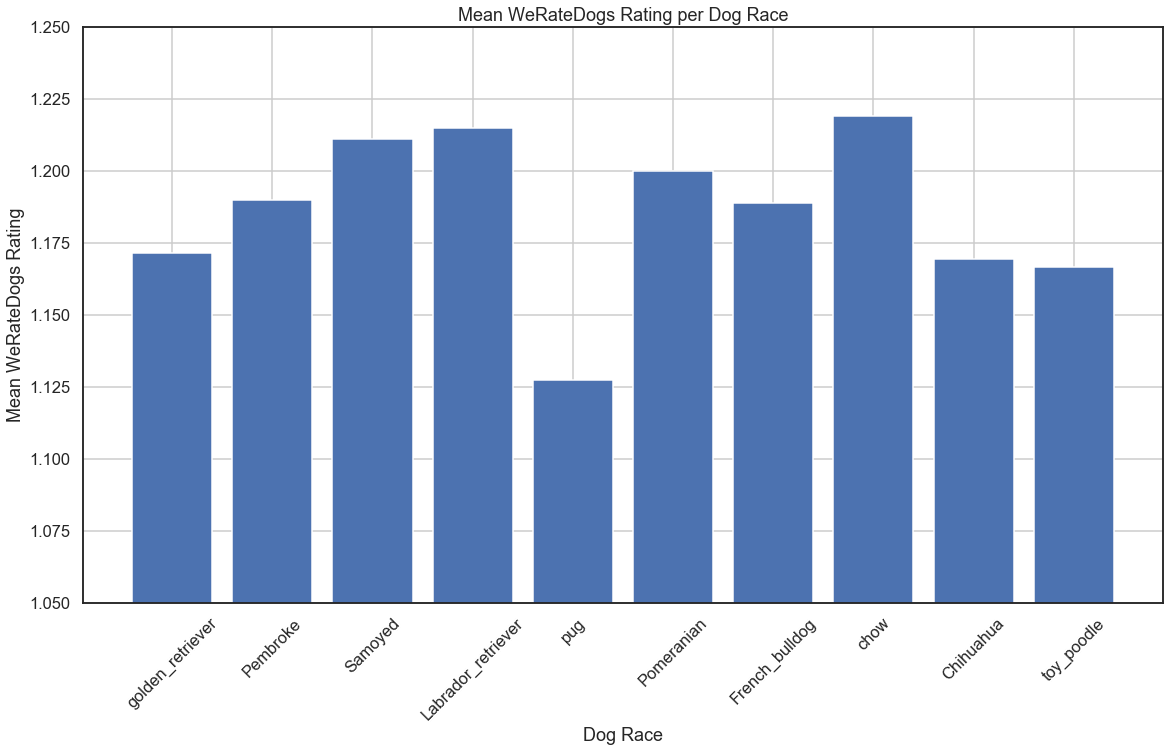

In [1737]:
# Set up the matplotlib figure
#fig = plt.figure(figsize=(15,8))

#ax = fig.add_axes([0,0,1,1])

#ax.bar(races,mean_race_rating)
#degrees = 45
#plt.xticks(rotation=degrees)

#ax.set_ylim([1.05,1.25])
#ax.grid()
#plt.xlabel('Dog Race');
#plt.ylabel('Mean WeRateDogs Rating');
#plt.title('Mean WeRateDogs Rating per Dog Race');
#plt.show()

#fig.savefig('D_MeanWeRateDogsRatingDogRace.png', bbox_inches='tight')
